In [1]:
from sdv.demo import load_tabular_demo
import pandas as pd
import numpy as np

In [15]:
# data = load_tabular_demo('student_placements')
# data1 = pd.read_excel('Seattle_vv_21.xlsx')
# a = pd.read_excel('Processed_Seattle_vv_21_modifiedbyFDR.xlsx',index_col=0)
# a.to_csv('processed_seattle_vv_21.csv',encoding='utf-8')

data1 = pd.read_csv('processed_seattle_vv_21.csv')

data1.head()
# data1.shape

,Severity,ADDRTYPEAlley,ADDRTYPEBlock,ADDRTYPEIntersection,COLLISIONTYPEAngles,COLLISIONTYPEHead.On,COLLISIONTYPELeft.Turn,COLLISIONTYPEParked.Car,COLLISIONTYPERear.Ended,COLLISIONTYPERight.Turn,...,ROADCONDSand.Mud.Dirt,ROADCONDSnow.Slush,ROADCONDStanding.Water,ROADCONDWet,LIGHTCONDDark...No.Street.Lights,LIGHTCONDDark...Street.Lights.Off,LIGHTCONDDark...Street.Lights.On,LIGHTCONDDawn,LIGHTCONDDaylight,LIGHTCONDDusk
0,Property Damage Only Collision,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,Property Damage Only Collision,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,Property Damage Only Collision,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,Property Damage Only Collision,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,Property Damage Only Collision,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [16]:
data1 = pd.get_dummies(data1,columns=['Severity'],dtype='int64')
data = data1.sample(frac=0.3)
# print(data.shape)
# print(type(data))  #DataFrame

print(data.dtypes)

data

ADDRTYPEAlley                              int64
ADDRTYPEBlock                              int64
ADDRTYPEIntersection                       int64
COLLISIONTYPEAngles                        int64
COLLISIONTYPEHead.On                       int64
COLLISIONTYPELeft.Turn                     int64
COLLISIONTYPEParked.Car                    int64
COLLISIONTYPERear.Ended                    int64
COLLISIONTYPERight.Turn                    int64
COLLISIONTYPESideswipe                     int64
Month1                                     int64
Month10                                    int64
Month11                                    int64
Month12                                    int64
Month2                                     int64
Month3                                     int64
Month4                                     int64
Month5                                     int64
Month6                                     int64
Month7                                     int64
Month8              

,ADDRTYPEAlley,ADDRTYPEBlock,ADDRTYPEIntersection,COLLISIONTYPEAngles,COLLISIONTYPEHead.On,COLLISIONTYPELeft.Turn,COLLISIONTYPEParked.Car,COLLISIONTYPERear.Ended,COLLISIONTYPERight.Turn,COLLISIONTYPESideswipe,...,LIGHTCONDDark...No.Street.Lights,LIGHTCONDDark...Street.Lights.Off,LIGHTCONDDark...Street.Lights.On,LIGHTCONDDawn,LIGHTCONDDaylight,LIGHTCONDDusk,Severity_Fatality Collision,Severity_Injury Collision,Severity_Property Damage Only Collision,Severity_Serious Injury Collision
1785,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
690,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
307,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3751,0,0,1,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2594,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
455,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1094,0,0,1,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
442,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0


In [17]:
from sdv.tabular import CopulaGAN
from sdv.constraints import OneHotEncoding

#这里是各种onehot的constraints
addr_type_constraint = OneHotEncoding(
    column_names=['ADDRTYPEAlley','ADDRTYPEBlock','ADDRTYPEIntersection']
)

collision_type_constraint = OneHotEncoding(
    column_names=['COLLISIONTYPEAngles', 'COLLISIONTYPEHead.On', 'COLLISIONTYPELeft.Turn',
       'COLLISIONTYPEParked.Car', 'COLLISIONTYPERear.Ended',
       'COLLISIONTYPERight.Turn', 'COLLISIONTYPESideswipe']
)

month_constraint = OneHotEncoding(
    column_names=['Month1',
       'Month10', 'Month11', 'Month12', 'Month2', 'Month3', 'Month4', 'Month5',
       'Month6', 'Month7', 'Month8', 'Month9']
)

time_in_day_constraint = OneHotEncoding(
    column_names=['Timeevening_peak','Timemorning_peak', 'Timenon_peak']
)

underinf_type_constraint = OneHotEncoding(  # 不知道什么意思
    column_names=['UNDERINFLN','UNDERINFLY']
)

weather_condition_constraint = OneHotEncoding(
    column_names=['WEATHERBlowing.Sand.Dirt', 'WEATHERBlowing.Snow',
       'WEATHERClear', 'WEATHERFog.Smog.Smoke', 'WEATHEROvercast',
       'WEATHERPartly.Cloudy', 'WEATHERRaining', 'WEATHERSevere.Crosswind',
       'WEATHERSleet.Hail.Freezing.Rain', 'WEATHERSnowing']
)

road_condition_constraint = OneHotEncoding(
    column_names=['ROADCONDDry',
       'ROADCONDIce', 'ROADCONDOil', 'ROADCONDSand.Mud.Dirt',
       'ROADCONDSnow.Slush', 'ROADCONDStanding.Water', 'ROADCONDWet']
)

light_condition_constraint = OneHotEncoding(
    column_names=['LIGHTCONDDark...No.Street.Lights',
       'LIGHTCONDDark...Street.Lights.Off', 'LIGHTCONDDark...Street.Lights.On',
       'LIGHTCONDDawn', 'LIGHTCONDDaylight', 'LIGHTCONDDusk']
)

severity_condition_constraint = OneHotEncoding(
    column_names=['Severity_Fatality Collision',
       'Severity_Injury Collision', 'Severity_Property Damage Only Collision',
       'Severity_Serious Injury Collision']
)



In [18]:
constraints = [
    addr_type_constraint,
    collision_type_constraint,
    month_constraint,
    time_in_day_constraint,
    underinf_type_constraint,
    weather_condition_constraint,
    road_condition_constraint,
    light_condition_constraint,
    severity_condition_constraint
]
model = CopulaGAN(constraints=constraints, enforce_min_max_values=False)

In [19]:
import time
t1 = time.time()
model.fit(data)
t2 = time.time()
print('cost time',t2-t1)

ValueError: `x0` violates bound constraints.

In [26]:
new_data = model.sample(len(data))

Sampling rows: 100%|██████████████████████████████████████████████████████████████| 1164/1164 [00:02<00:00, 461.41it/s]


In [28]:
new_data.shape

(1164, 54)

In [29]:
new_data['Severity_Fatality Collision'].sum()

171

In [31]:
data1['Severity_Fatality Collision'].sum()

2

In [32]:
distributions = model.get_distributions()

In [33]:
distributions

{'ADDRTYPEAlley.value': 'copulas.univariate.truncated_gaussian.TruncatedGaussian',
 'ADDRTYPEBlock.value': 'copulas.univariate.truncated_gaussian.TruncatedGaussian',
 'ADDRTYPEIntersection.value': 'copulas.univariate.truncated_gaussian.TruncatedGaussian',
 'COLLISIONTYPEAngles.value': 'copulas.univariate.truncated_gaussian.TruncatedGaussian',
 'COLLISIONTYPEHead.On.value': 'copulas.univariate.truncated_gaussian.TruncatedGaussian',
 'COLLISIONTYPELeft.Turn.value': 'copulas.univariate.truncated_gaussian.TruncatedGaussian',
 'COLLISIONTYPEParked.Car.value': 'copulas.univariate.truncated_gaussian.TruncatedGaussian',
 'COLLISIONTYPERear.Ended.value': 'copulas.univariate.truncated_gaussian.TruncatedGaussian',
 'COLLISIONTYPERight.Turn.value': 'copulas.univariate.truncated_gaussian.TruncatedGaussian',
 'COLLISIONTYPESideswipe.value': 'copulas.univariate.truncated_gaussian.TruncatedGaussian',
 'Month1.value': 'copulas.univariate.truncated_gaussian.TruncatedGaussian',
 'Month10.value': 'copulas

In [34]:
data1.LIGHTCONDDusk.value_counts()

0    3755
1     126
Name: LIGHTCONDDusk, dtype: int64

In [35]:
data1['LIGHTCONDDusk'].sum()

126

In [39]:
data1['Severity_Fatality Collision'].value_counts()

0    3879
1       2
Name: Severity_Fatality Collision, dtype: int64

<AxesSubplot:>

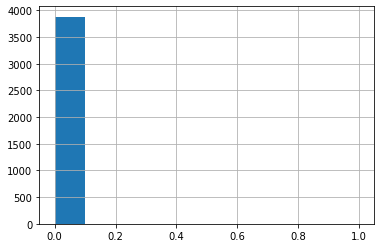

In [40]:
data1['Severity_Fatality Collision'].hist()